<a href="https://colab.research.google.com/github/itsJonnie/hands-on-ml-exercises/blob/main/ch4_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data.
* For a Regresion Model the most common metric to measure performance is **Root Mean Square Error (RMSE)**

$\text{RMSE}(y, \hat{y}) = \sqrt{\frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}}$


You want to minimize the MSE or the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root). These are known in this case as *cost functions* & the **goal is to minimize the cost function**


https://builtin.com/machine-learning/cost-function

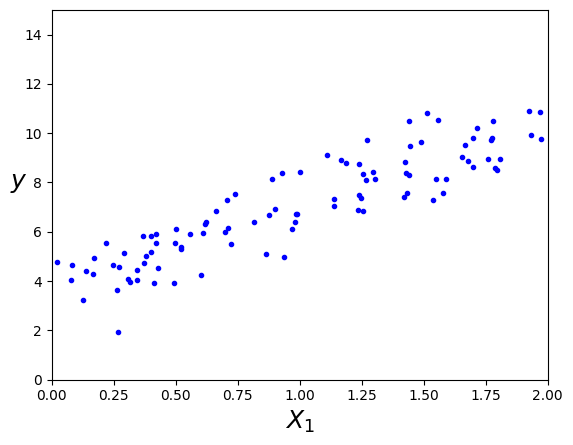

In [6]:
# generate some linear looking data:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

* We need to computed our predicted theta value which is our weights. In other words this represents the estimated or predicted values of the regression parameters (coefficients) θ that minimize the difference between the predicted and actual values of the dependent variable (minimize cost function)
* What values of θ will minimize cost function?

In [8]:
# compute thetha_hat using the Normal Equation?
# use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.73431219],
       [3.34522503]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict # prediction for the linear regression model

array([[ 3.73431219],
       [10.42476226]])

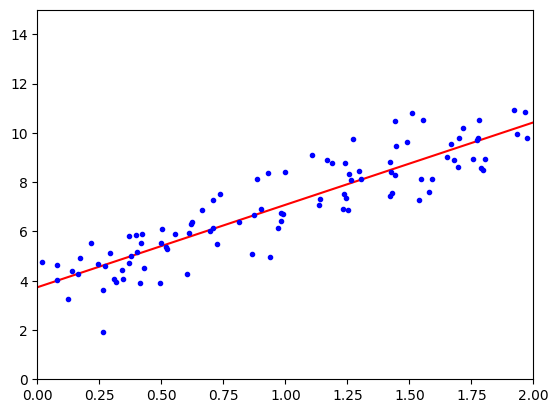

In [11]:
# plot the prediction for linear regression model:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


Gradient Descent:
https://mlpills.dev/machine-learning/gradient-descent/

* Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.
* It measures the local gradient of the error function with regards to the parameter vector (theta) and goes in the direction of descending gradient. **Once the gradient is 0, you have reached a minimum** (local minimum)
* Concretely, you start by filling θ with random values (this is called random initializa‐ tion), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum

![Gradient Descent](https://mlpills.dev/wp-content/uploads/2022/10/CaIB7lz-h.jpg)


* in this algorithm, the *learning-rate* has to be tuned which is the size of the steps the algorithm takes. See arrows between blue dots above ^
* you don't want a rate that is too high or too low.

In [12]:
# Gradient Descent Implementation:

ChatGPT explanation:

* Imagine you're trying to learn how to shoot a basketball into a hoop, and every time you shoot, you adjust your aim a little bit based on where the ball goes. This code is like that—it's trying to "learn" the best aim (which we call theta) by making small adjustments based on feedback (the gradients).

**Variables**
* eta (learning rate): Think of this as how big of a step you take when you adjust your aim. A value of 0.1 means you change your aim by a little bit each time.
* n_iterations: This is like practicing 1000 shots. The more times you practice, the better your aim gets.
* m: This is the total number of examples we have (like having 100 different basketball shots to learn from).
* random initialization of theta - theta: These are the numbers that control our aim. We start with a random aim, like randomly pointing your arm when you first try shooting.

In [16]:
eta = 0.1 # learning rate
n_iterations = 1000
m=100

theta = np.random.randn(2,1) # random initialization - theta: These are the numbers that control our aim. We start with a random aim, like randomly pointing your arm when you first try shooting.

# iterate 1000 times (n_iterations) and calculate gradients.
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # gradients tell you which way and how much to adjust your aim
  theta = theta - eta * gradients # update your theta value (adjust your aim by moving in the opposite direction of the error. Think of it as moving your arm a little to the left if your ball was going too far right.)

In [14]:
# let's look at theta (the minima)
theta



array([[3.73431219],
       [3.34522503]])

**Stochastic Gradient Descent**

* The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)
* On the other hand, due to its *stochastic (i.e., random)* nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). So once the algorithm stops, the final parameter values are good, but not optimal.
* Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does due to randomness.
* Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated anneal‐ ing, an algorithm inspired from the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [21]:
# This code implements Stochastic Gradient Descent using a simple learning schedule:

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients


In [22]:
# By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole training set,
# this code goes through the training set only 50 times and reaches a fairly good solution:

theta

array([[3.84222651],
       [3.30529049]])

In [25]:
# Linear Regression using SGD with Scikit-Learn:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.7275456]), array([3.33858084]))

**Mini Batch GD**
* Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance(as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

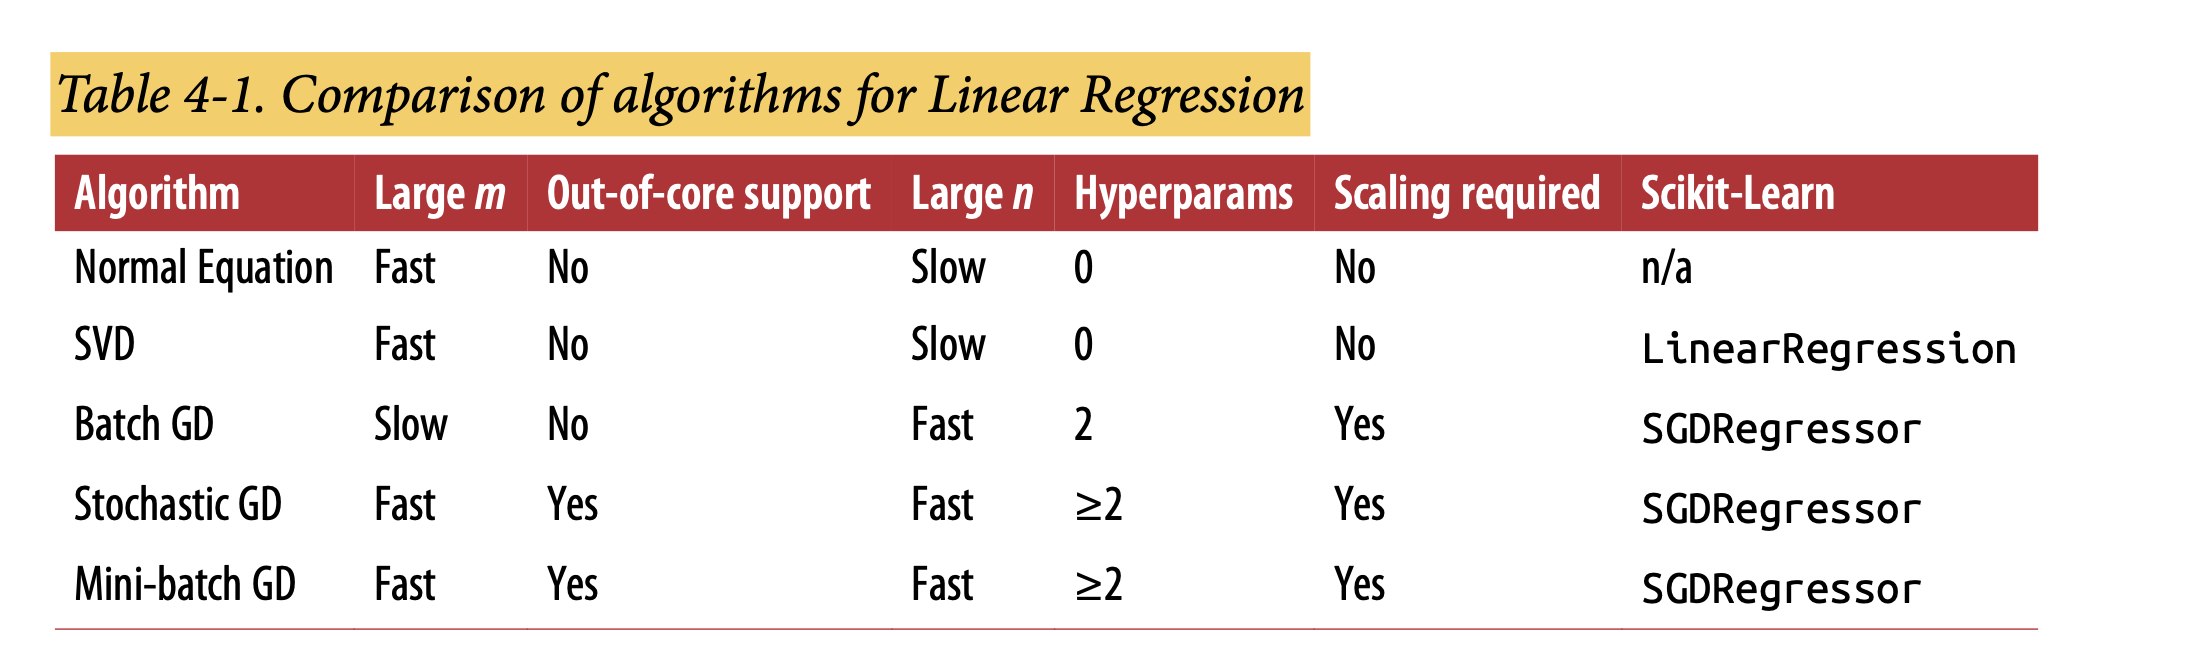

**Polynomial Regression**
* What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

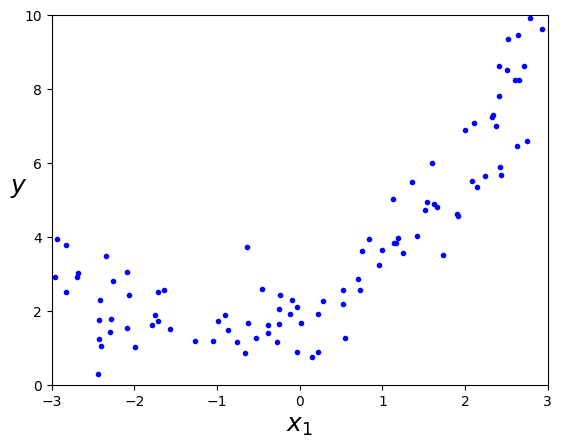

In [28]:
# Polynomial Regression Example:

# generate non-linear data based on quadratic equation: y = ax^2 +bx + c
m=100
X = 6 * np.random.rand(m, 1) - 3 #
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

* Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly nomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.24718214]
[-0.24718214  0.06109901]


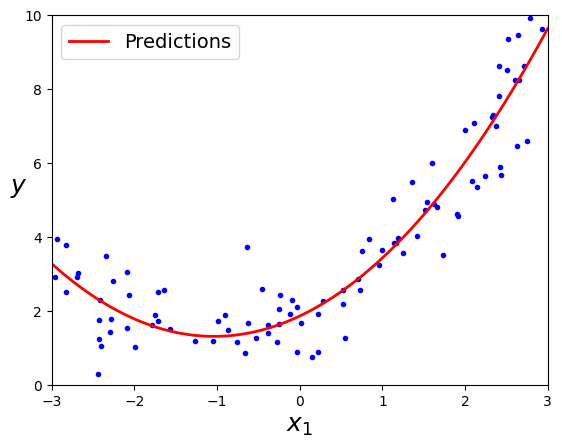

In [34]:
# X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# plot this: Polynomial Regression model predictions
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

**Logistic Regression**
* Some regression algorithms can be used for classification as well (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

In [36]:
# Iris Dataset Example:

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


LogisticRegression()

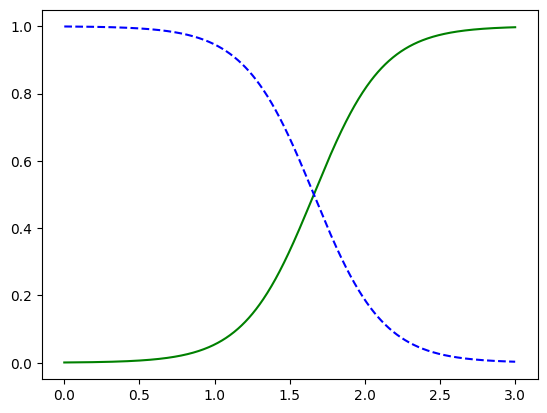

In [37]:
# Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

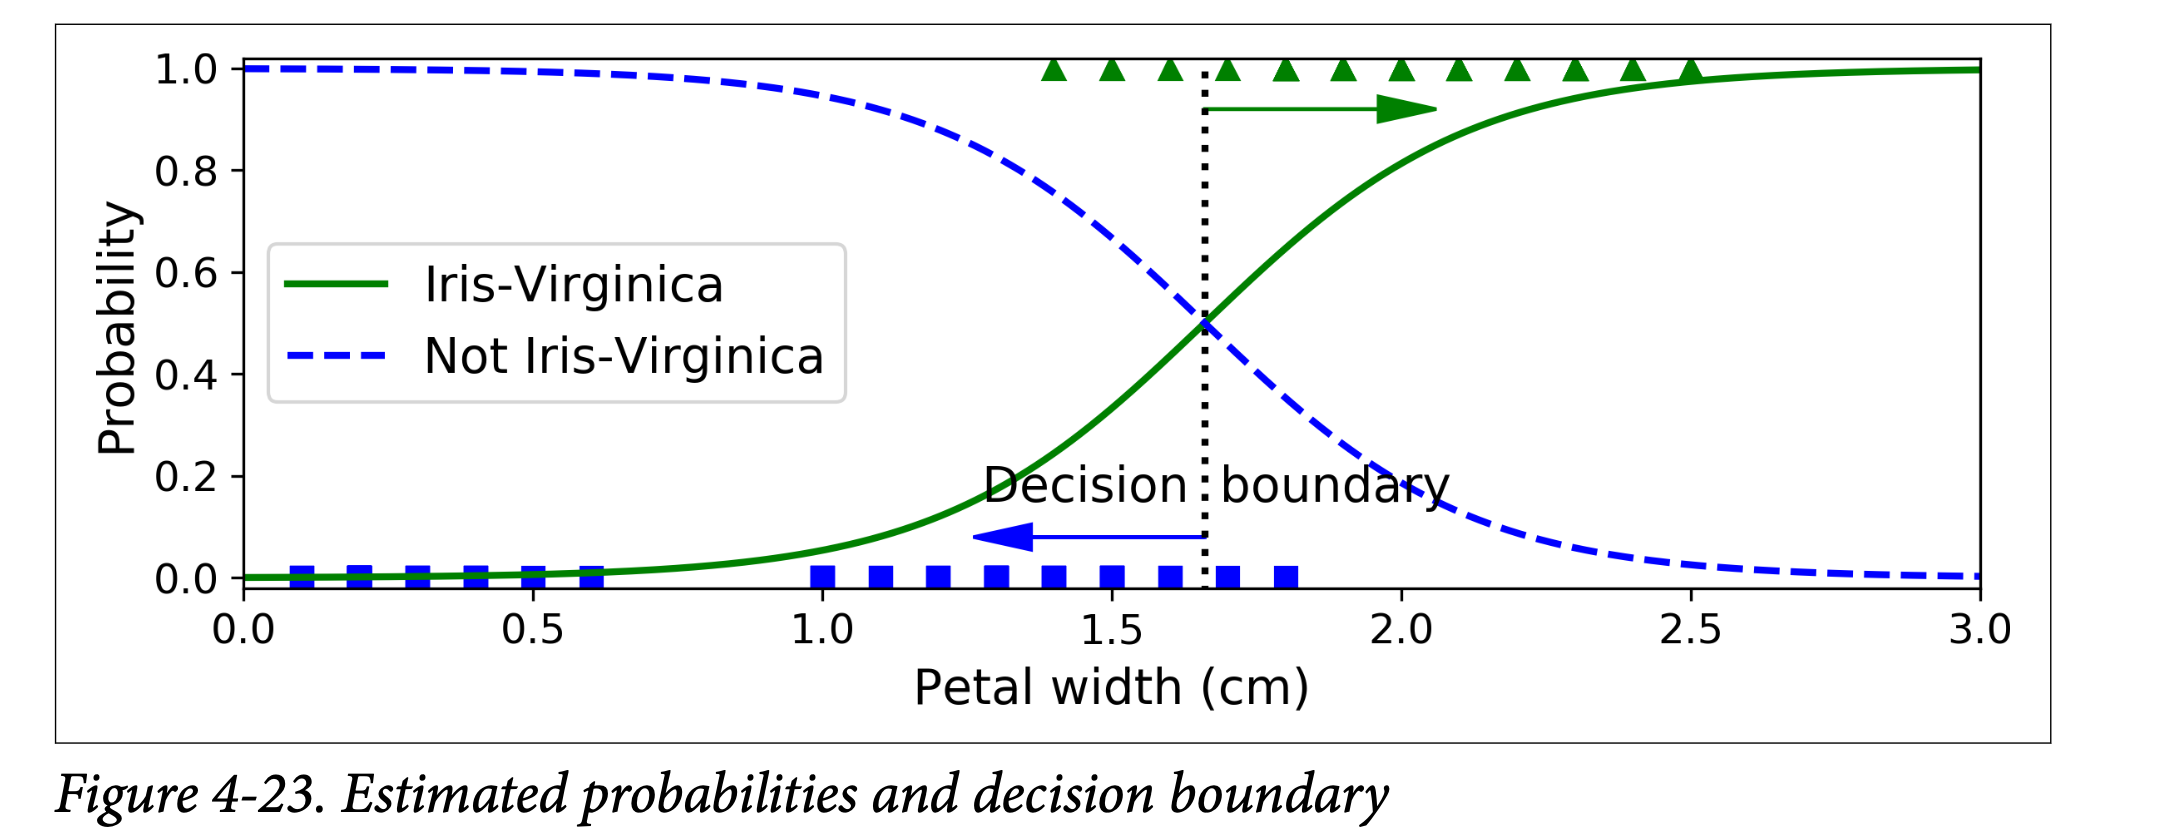

## Exercises:
1. What Linear Regression training algorithm can you use if you have a training set with millions of features?
* For training linear regression models with millions of features, use iterative algorithms that scale well such as: Stochastic Gradient Descent (SGD) or Mini-batch Gradient Descent, as they can handle large datasets and high-dimensional feature spaces more effectively than traditional methods such as the Normal Equation

2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?
* When features have very different scales, algorithms that use distances (e.g., k-NN, k-Means, SVM with RBF) or gradient-based updates (e.g., gradient descent, SGD) can be negatively affected. Larger-scaled features can dominate the distance calculations or gradients, causing slow convergence or poor model performance. The solution is to scale your features—commonly by standardizing (subtracting the mean and dividing by the standard deviation) or applying min–max normalization—so that all features contribute equally.

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?
* No. The cost function for logistic regression is convex, which means it has a single global minimum. As a result, gradient descent will converge to that global minimum rather than getting stuck in a local minimum.

4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?
* For convex problems (like logistic regression), if you run gradient descent with appropriate settings (e.g., proper learning rate decay), all variants will converge to the same global optimum. However, for non-convex problems, different gradient descent methods may converge to different local minima even if run for a long time.

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

When the validation error steadily increases with each epoch, it usually means your model is not converging properly. In many cases, this is because your learning rate is too high, causing the gradient descent steps to overshoot the optimum. To fix this, you can:

- **Lower the learning rate:** Try reducing it so that your parameter updates are smaller and more stable.
- **Use a learning rate schedule:** Gradually decrease the learning rate over time.
- **Switch to an adaptive optimizer:** Consider using Adam or RMSProp, which adjust the learning rate for each parameter automatically.

These adjustments should help your model converge and improve validation performance.

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?
* It's usually not a good idea to stop mini-batch gradient descent immediately after a single increase in validation error. In mini-batch training, fluctuations are common due to noise in the gradient estimates. Instead, it's better to use early stopping with a patience parameter—waiting for several epochs of increasing validation error before halting training. This approach helps ensure that you don't stop training prematurely due to random variations.

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?
Stochastic Gradient Descent (SGD) tends to move toward the region of the optimum very quickly because it updates after each example, but its noisy updates often cause it to oscillate around the optimal value rather than settle exactly on it. In contrast, Batch Gradient Descent—though computationally heavier per iteration—uses the full training set to compute a precise gradient and will eventually converge to the optimum. Mini-batch Gradient Descent offers a compromise, balancing speed and stability.

To help the faster (but noisier) algorithms converge, you can:
- **Use a learning rate schedule:** Gradually decrease the learning rate so that as you get closer to the optimum, the steps become smaller.
- **Employ momentum or adaptive methods:** Techniques like momentum, Adam, or RMSProp help smooth out the updates and can drive the parameters toward convergence.
- **Increase the batch size (for mini-batch GD):** A larger batch size reduces noise in the gradient estimates, which can help with convergence.

In summary, SGD reaches the vicinity of the optimal solution the fastest, but Batch Gradient Descent is the one that actually converges reliably (and mini-batch is a balance of both). Adjusting the learning rate (decay) and using techniques like momentum can make SGD and mini-batch GD converge as well.

8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?


* The large gap between training error and validation error indicates that your model is overfitting the training data—it learns the training set too well (low training error) but fails to generalize to new data (high validation error).

Here are three ways to solve this:

1. **Reduce Model Complexity:**  
   Decrease the degree of your polynomial so that your model is less flexible and less likely to overfit.

2. **Regularization:**  
   Apply regularization techniques such as Ridge (L2) or Lasso (L1) regression to penalize large coefficients. This encourages simpler models that generalize better.

3. **Increase Training Data:**  
   Gather more data or use data augmentation. More training examples help reduce variance and allow the model to generalize more effectively.

These strategies help balance the bias-variance trade-off and should reduce the gap between training and validation errors.

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

When the training and validation errors are both high and nearly equal, it indicates that the model is underfitting—that is, it has high bias and low variance. The model is too simple (or too regularized) to capture the underlying patterns in the data.

To help the model fit the data better, you should **reduce** the regularization hyperparameter α. This will allow the model more flexibility and potentially lower both the training and validation errors.

10. Why would you want to use:
* Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
  * Plain Linear Regression:
    Minimizes the sum of squared errors but can overfit when there are many features or multicollinearity (highly correlated features).
  * Ridge Regression (L2 Regularization):
    Adds a penalty on the size of coefficients (squared L2 norm).
    Advantage: Reduces overfitting by shrinking coefficients, especially when features are correlated.Use When: You need to improve generalization without eliminating features.
* Lasso instead of Ridge Regression?
  * Lasso Regression (L1 Regularization):
  * Advantage:
    * Encourages sparsity, meaning it can set some coefficients exactly to zero, effectively performing feature selection. Use When: You suspect many features are irrelevant, and you want a simpler, more interpretable model with automatic feature selection.
* Elastic Net instead of Lasso?
  * Elastic Net:
    * Combines L1 (Lasso) and L2 (Ridge) penalties.
    * Advantage:
        * Provides a balance between Ridge and Lasso: it can perform feature selection like Lasso while also handling groups of correlated features better than Lasso alone.
        * It avoids the limitation of Lasso where it might select just one feature from a group of correlated ones, instead potentially including or excluding entire groups.
    * Use When:
        * You have many features and expect that some are correlated.
        * You want the sparsity of Lasso while also benefiting from the stability of Ridge.

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

For this problem, it's generally better to use two logistic regression classifiers rather than one softmax regression classifier. Here's why:

Independent Decisions:
Outdoor/indoor and daytime/nighttime are two separate binary attributes. Each picture has two independent properties: one is either outdoor or indoor, and the other is either daytime or nighttime.

Mutually Exclusive Classes vs. Multiple Labels:
A softmax classifier is used when you have a single categorical label with mutually exclusive classes (for example, one out of four categories). In our case, combining outdoor/indoor and daytime/nighttime into one label would yield four classes (e.g., outdoor-daytime, outdoor-nighttime, indoor-daytime, indoor-nighttime). However, this forces the assumption that these four combinations are mutually exclusive and ignores any independent structure between the two attributes.

Flexibility:
By using two logistic regressions, you model each attribute separately. This often leads to better performance when the attributes are independent because each classifier can focus on learning the decision boundary for one specific aspect without being influenced by the other.

12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

In [1]:
import numpy as np

def softmax(z):
    # For numerical stability, subtract the max value in each row.
    z -= np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss(X, y, theta):
    """
    Compute the cross-entropy loss for Softmax Regression.

    X: Training examples, shape (m, n)
    y: One-hot encoded labels, shape (m, k)
    theta: Model parameters, shape (n, k)
    """
    m = X.shape[0]
    logits = X.dot(theta)        # Shape: (m, k)
    probs = softmax(logits)       # Shape: (m, k)
    # Add a tiny value to probs to avoid log(0)
    loss = -np.sum(y * np.log(probs + 1e-15)) / m
    return loss

def gradient(X, y, theta):
    """
    Compute the gradient of the cross-entropy loss with respect to theta.

    Returns a gradient of shape (n, k)
    """
    m = X.shape[0]
    logits = X.dot(theta)
    probs = softmax(logits)
    grad = (X.T).dot(probs - y) / m
    return grad

def batch_gradient_descent_softmax(X_train, y_train, X_val, y_val, theta_init, eta=0.1, n_iterations=1000, patience=10):
    """
    Train a Softmax Regression model using Batch Gradient Descent with early stopping.

    X_train, y_train: Training data (X_train shape (m, n), y_train shape (m, k))
    X_val, y_val: Validation data (with same shapes)
    theta_init: Initial model parameters (shape (n, k))
    eta: Learning rate
    n_iterations: Maximum number of iterations (epochs)
    patience: Number of iterations to wait for improvement in validation loss before stopping early.

    Returns the best theta found.
    """
    theta = theta_init.copy()
    best_theta = theta.copy()
    best_val_loss = np.inf
    stopping_counter = 0

    for iteration in range(n_iterations):
        # Compute gradient and update theta
        grad = gradient(X_train, y_train, theta)
        theta -= eta * grad

        # Compute validation loss
        val_loss = compute_loss(X_val, y_val, theta)

        # If validation loss improves, save theta and reset counter
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_theta = theta.copy()
            stopping_counter = 0
        else:
            stopping_counter += 1

        # Early stopping if no improvement for 'patience' iterations
        if stopping_counter >= patience:
            print(f"Early stopping at iteration {iteration}")
            break

        if iteration % 100 == 0:
            train_loss = compute_loss(X_train, y_train, theta)
            print(f"Iteration {iteration}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return best_theta

# ----------------------------
# Example usage:
# Let's simulate some data for a 3-class problem with 5 features.
np.random.seed(42)
m_train, m_val, n, k = 500, 100, 5, 3
X_train = np.random.rand(m_train, n)
X_val = np.random.rand(m_val, n)
# Random integer labels (0,1,2), then one-hot encode them
labels_train = np.random.randint(0, k, size=m_train)
y_train = np.eye(k)[labels_train]
labels_val = np.random.randint(0, k, size=m_val)
y_val = np.eye(k)[labels_val]

# Initialize theta randomly (shape (n, k))
theta_init = np.random.randn(n, k)

# Train the model using Batch Gradient Descent with early stopping
best_theta = batch_gradient_descent_softmax(X_train, y_train, X_val, y_val, theta_init, eta=0.1, n_iterations=1000, patience=10)

print("Best theta:\n", best_theta)


Iteration 0, Train Loss: 1.9483, Val Loss: 1.9332
Iteration 100, Train Loss: 1.1250, Val Loss: 1.0967
Iteration 200, Train Loss: 1.1109, Val Loss: 1.0941
Early stopping at iteration 253
Best theta:
 [[-0.27360002  0.66782116  0.2058412 ]
 [ 0.15213539 -0.28084568  0.01192974]
 [ 0.05262392  0.27059184  0.25625496]
 [ 0.14794383  0.01558561 -0.29046047]
 [ 0.44948763 -0.17846655  0.34264958]]
